# Import Library

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read & Analyze Data

In [2]:
file_path = 'training_data.csv'
df = pd.read_csv(file_path)
df.head()

,size (square feet),number of bedrooms,price ($)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


- Comment:
> Từ dữ liệu trong bảng ta có thể rút ra ý nghĩa của các thuộc tính như sau:
> - size (square feet): kích thước của ngôi nhà.
> - number of bedrooms: số phòng ngủ.
> - price ($): giá nhà.

In [3]:
df.describe()

,size (square feet),number of bedrooms,price ($)
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


- Comment:
> Từ các giá trị thống kê dữ liệu của các thuộc tính trong bảng ta có thể rút ra được:
> - Số dòng dữ liệu là 47.
> - Các giá trị thống kê khác đã được thể hiện rõ trong bảng lần lượt là: số lượng dòng, trung bình, độ lệch chuẩn, min, tứ phân vị thứ nhất, trung vị, tứ phân vị thứ ba, max.

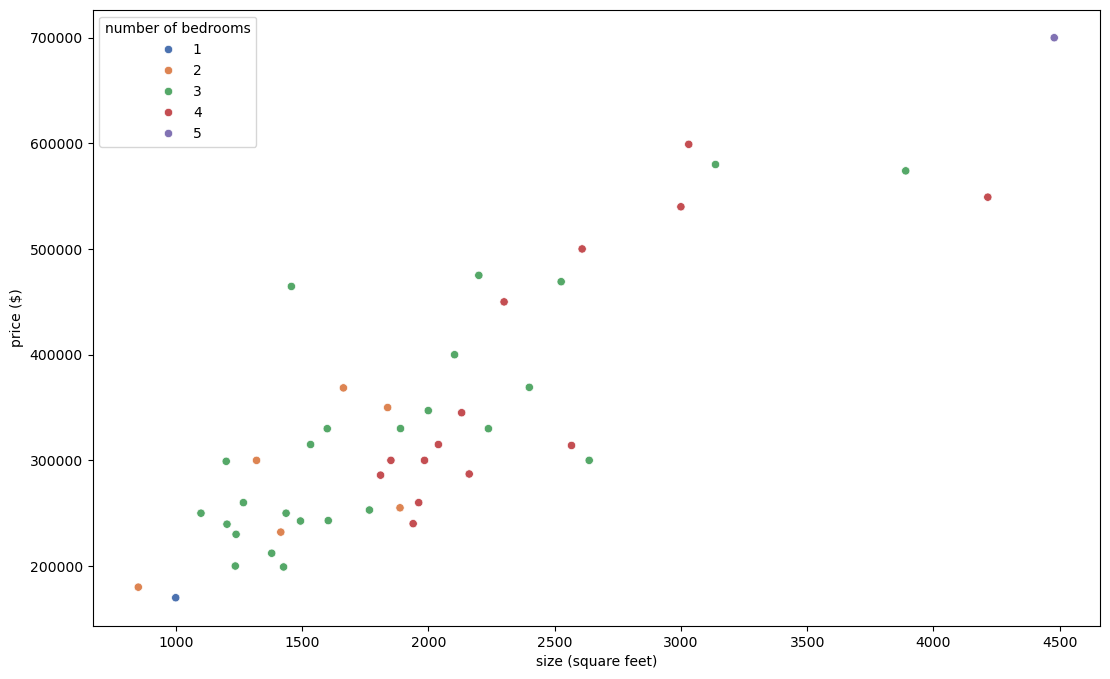

In [4]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(data=df, x='size (square feet)', y='price ($)', 
                     hue='number of bedrooms', palette='deep')
plt.show()

- Comment:
> Từ biểu đồ phân tán ta có thể rút ra nhận xét:
> - Dường như có mối quan hệ tuyến tính giữa kích thước của ngôi nhà và giá của ngôi nhà đó.
> - Chưa có sự phân biệt rõ rệt giữa những ngôi nhà có kích thước khác nhau (về giá cả).

# Helper Functions

In [5]:
def standardize_train_set(X):
    #todo
    mu = np.mean(X, axis=0)
    #todo
    sigma = np.std(X, axis=0)
    #todo
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [6]:
def standardize_test_set(X, mu, sigma):
    #todo
    #pass
    X_norm = (X - mu) / sigma
    return X_norm

In [7]:
class LinearRegression:
    def __init__(self, alpha=0.001, iters=1000, verbose=False):
        self.alpha = alpha
        self.iters = iters
        self.verbose = verbose
        self.theta = None
    
    def calculate_square_error(self, X, y, theta):
        #todo
        #pass
        h_theta = np.dot(X, theta)
        loss = h_theta - y
        return np.mean(np.abs(loss)**2)
    
    def gradient(self, X, y, theta):
        m = len(y)

        #todo
        h_theta = np.dot(X, theta)
        loss = h_theta - y

        #todo
        dJ = np.dot(X.T, loss) / m
        J = np.sum((loss ** 2) / (2*m))

        return (J, dJ)
    
    def gradient_descent(self, X, y):
        X = np.c_[np.ones(len(X),dtype='int64'), X]
        theta = np.zeros(X.shape[1])
        print(f'The total of training sample: {len(y)}')
        for i in range(self.iters):
            #todo
            J, dJ = self.gradient(X, y, theta)
            #todo
            theta = theta - self.alpha * dJ
            if self.verbose:
                print(f'Iter {i + 1}, loss = {self.calculate_square_error(X, y, theta)}')
        return theta
    
    def fit(self, X, y):
        self.theta = self.gradient_descent(X, y)
    
    def predict(self, X):
        results = []
        for Xi in X:
            #todo
            results.append(np.dot(Xi, self.theta))
        return results

# Main Function

## Train Model

In [8]:
#Load config
with open('config.json',) as f:
    configs = json.load(f)
#Feature-Label split
#todo
X = df['size (square feet)']
#todo
y = df['price ($)']
#Standardize feature and Train model
X, mu, sigma = standardize_train_set(X)
model = LinearRegression(alpha= configs['alpha'], iters=configs['iters'], verbose=False)
model.fit(X, y)

The total of training sample: 47


## Visualize Model

In [9]:
x_surf, y_surf = np.meshgrid(np.linspace(df['size (square feet)'].min(), df['size (square feet)'].max()),
                 np.linspace(df['number of bedrooms'].min(), df['number of bedrooms'].max()))

surf_df = pd.DataFrame({'size (square feet)': x_surf.ravel(), 'number of bedrooms': y_surf.ravel()})
predicted = np.array(model.predict(standardize_test_set(surf_df.values, mu, sigma)))

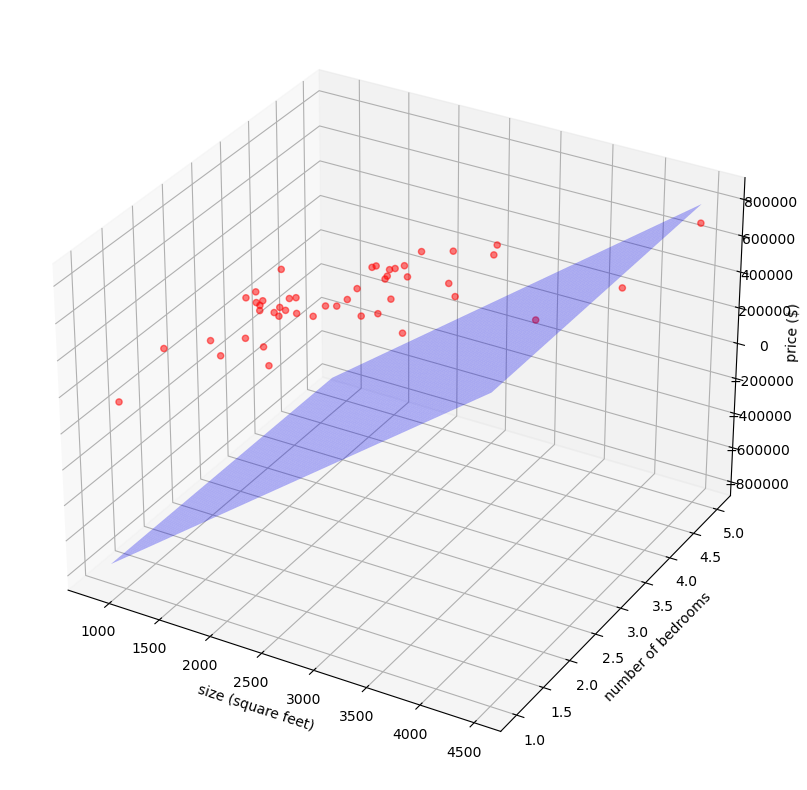

In [10]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['size (square feet)'], df['number of bedrooms']
           ,df['price ($)'], c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predicted.reshape(x_surf.shape), color='b', alpha=0.3)

ax.set_xlabel('size (square feet)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price ($)')
plt.show()

- Comment:
> Mặt phẳng màu tím trong đồ thị biểu diễn kết quả của mô hình hồi quy tuyến tính.
> 
> Từ kết quả trên ta thấy không có nhiều điểm nằm trên mặt phẳng hồi quy nên mô hình này chưa thật sự hiệu quả.

## Predict Sample

In [11]:
sample = [1650, 3]
#todo
y_predict = model.predict([(sample - mu) / sigma])
print(f'House price expected is {round(y_predict[0])}$')

House price expected is -420559$


## Save Results

In [12]:
#Save model
with open('model.json', 'w') as f:
    #todo
    json.dump({'theta: ': model.theta.tolist()}, f)
#Save prediction result
with open('price.json', 'w') as f:
    result = {
        #todo
        'size (square feet): ': sample[0],
        #todo
        'number of bedrooms': sample[1],
        #todo
        'price ($)': round(y_predict[0])
    }
    json.dump(result, f)